In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set_theme(style="whitegrid")

In [189]:
url = "https://ironhack-nlp.herokuapp.com/"
chats = "api/chats"
res = requests.get(url+chats).json()

In [190]:
chats = pd.DataFrame(res)
chats.drop(columns=['id', 'user_id'], inplace=True)
chats

,message,sentiment,created_at,name,sex,age
0,Buenas tardes. Qué tal?,0.4404,2021-05-03 13:34:21,Unaiat,M,32
1,Que bien mañana se presentan proyectos!,0.4926,2021-05-03 12:57:07,Fran,M,37
2,Mañana se presentan proyectos,0.0000,2021-05-03 12:56:12,Fer,M,23
3,Es en español,0.0000,2021-05-03 12:53:54,javier cabrera,M,24
4,Hey ho let’s go hey oh let’s go,0.0000,2021-05-03 12:53:20,javier cabrera,M,24
5,Que vida más triste,-0.4939,2021-05-03 12:52:14,Ana,F,32
6,Enhorabuena! Has gando,0.6360,2021-05-03 12:49:32,Ana,F,32
7,Parece que mañana va llover...que triste!,-0.5255,2021-05-03 12:49:23,Fran,M,37
8,Gacias Ana!,0.4926,2021-05-03 12:46:30,Fran,M,37
9,"Suena genial, solo te retrasarse un poco",0.3818,2021-05-03 12:46:11,Ana,F,32


In [191]:
chats.describe()

,sentiment,age
count,24.000000,24.000000
mean,0.124913,27.375000
std,0.368913,8.494563
min,-0.599400,18.000000
25%,0.000000,18.000000
50%,0.000000,28.000000
75%,0.479625,37.000000
max,0.636000,37.000000


In [192]:
chats.corr()


,sentiment,age
sentiment,1.000000,0.303549
age,0.303549,1.000000


In [193]:
avg=chats.groupby("name").sentiment.mean().sort_values(ascending=False)
avg_df = pd.DataFrame(data=avg)
avg_df

,sentiment
name,
Unaiat,0.440400
Fran,0.240025
Ana,0.174633
Bill Gates,0.012600
Fer,0.000000
javier cabrera,0.000000


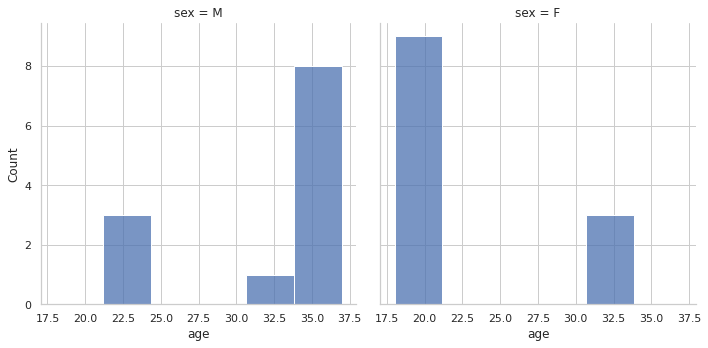

In [194]:
sns.displot(
    chats, x="age", col="sex",
    facet_kws=dict(margin_titles=True),
)

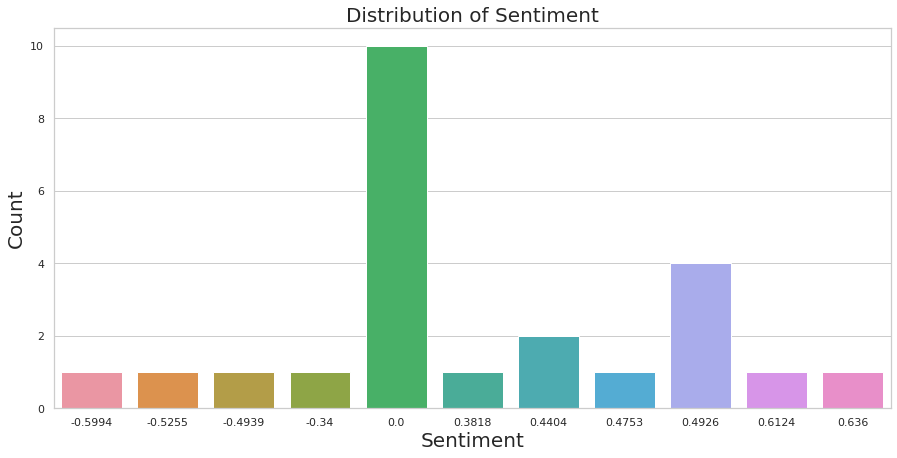

In [195]:
plt.figure(figsize = (15, 7))
ax = sns.countplot(x = 'sentiment', data = chats)
ax.set_title(label = 'Distribution of Sentiment', fontsize = 20)
ax.set_xlabel(xlabel = 'Sentiment', fontsize = 20)
ax.set_ylabel(ylabel = 'Count', fontsize = 20)
plt.show()

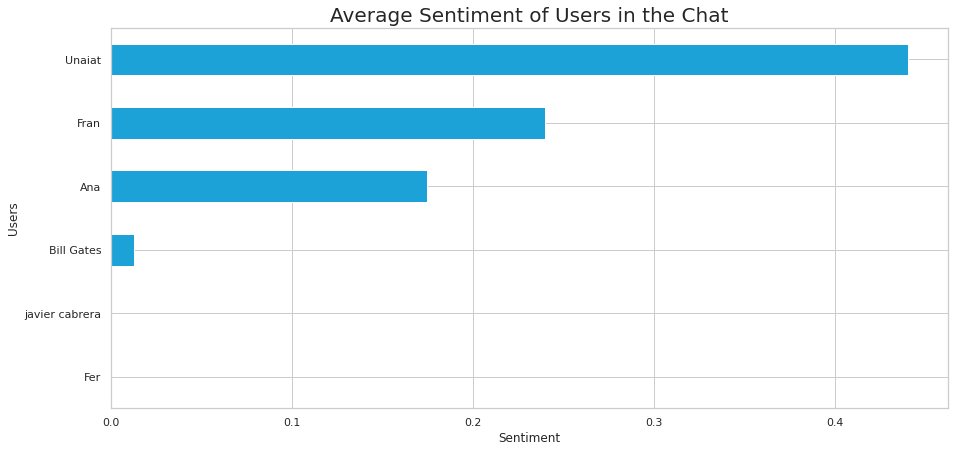

In [205]:
chats.groupby("name").sentiment.mean().sort_values().plot.barh(color="#1da2d8", figsize = (15, 7))
plt.title('Average Sentiment of Users in the Chat', fontsize = 20, fontweight = 14)
plt.xlabel('Sentiment')
plt.ylabel('Users')
plt.show()

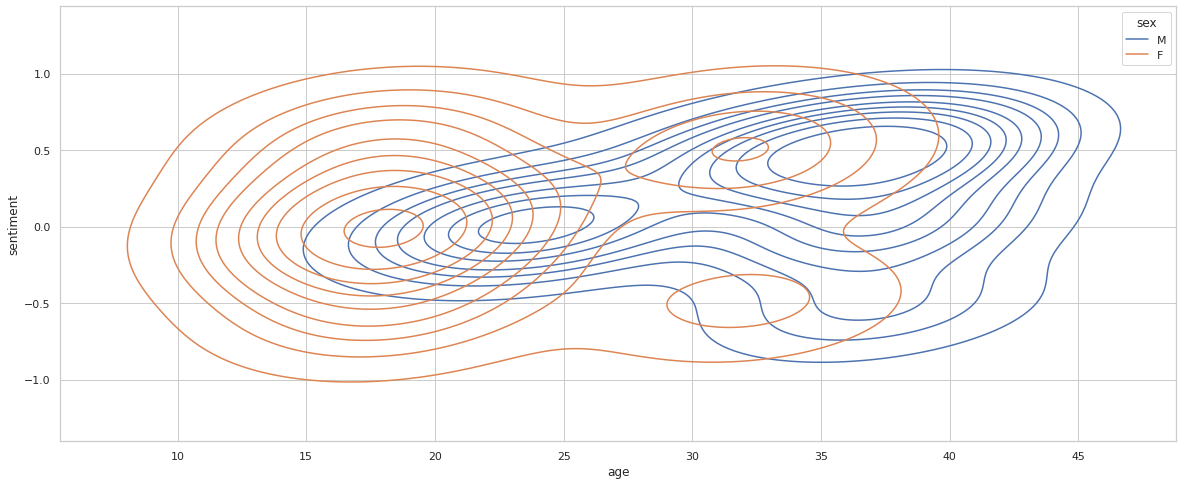

In [204]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20, 8))
sns.kdeplot(
    data=chats,
    y="sentiment",
    x="age",
    hue="sex"
)
fig.savefig("images/sentikde.png")


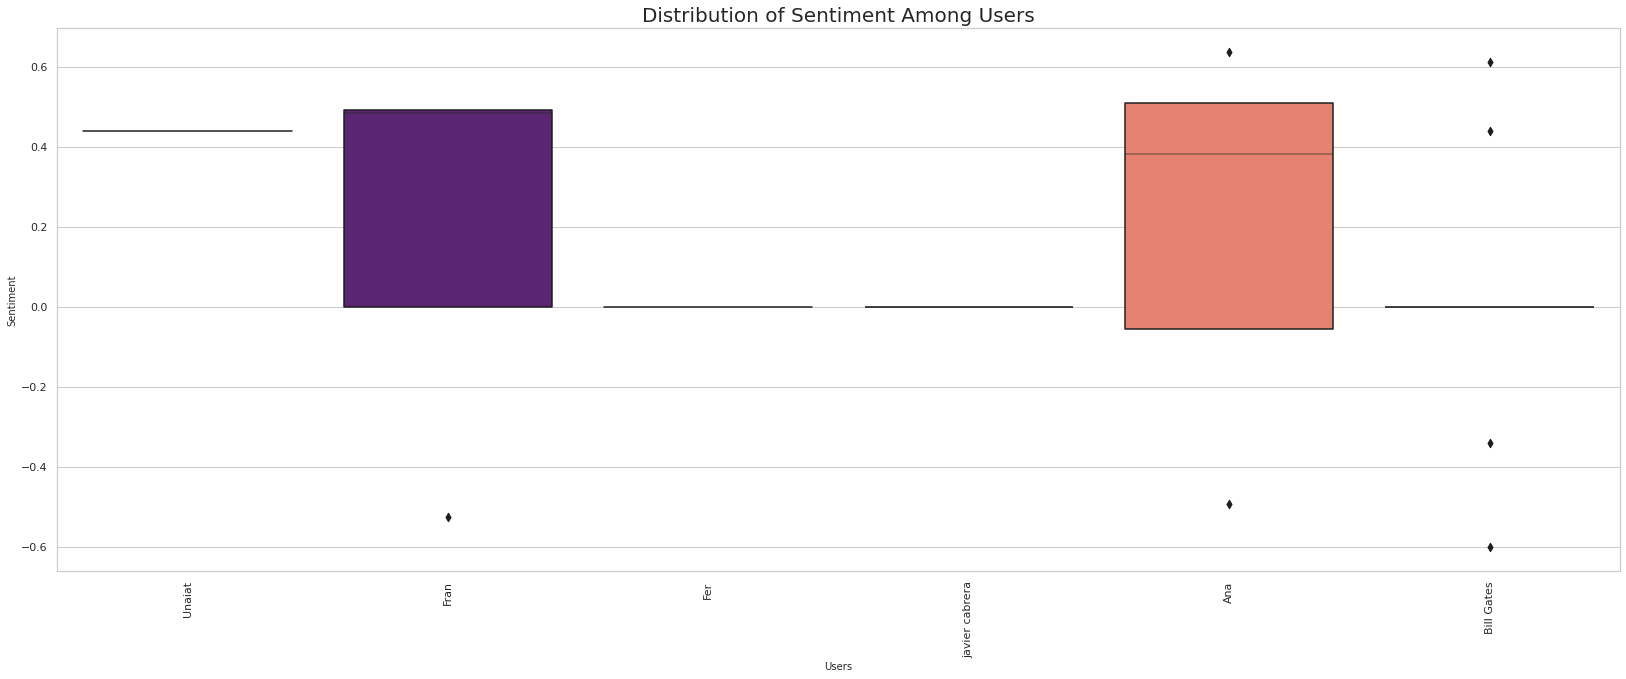

In [198]:
plt.rcParams['figure.figsize'] = (28, 10)
ax = sns.boxenplot(x = 'name', y = 'sentiment', data = chats, palette = 'magma')
ax.set_xlabel(xlabel = 'Users', fontsize = 10)
ax.set_ylabel(ylabel = 'Sentiment', fontsize = 10)
ax.set_title(label = 'Distribution of Sentiment Among Users', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()